# ***Student Perfromance Dataset / Classification***

*Imports*

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [78]:
import warnings
warnings.filterwarnings('ignore')

*Functions*

In [79]:
# Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

# Trivial classifier - randomly outputs class labels with probability based on class priors
def trivial_classifier(Y_train, data):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/(len(Y_train)*100), np.count_nonzero(y_grades_train == 1)/(len(Y_train)*100),
    np.count_nonzero(y_grades_train == 2)/(len(Y_train)*100), np.count_nonzero(y_grades_train == 3)/(len(Y_train)*100),
    np.count_nonzero(y_grades_train == 4)/(len(Y_train)*100)]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

# Baseline Model - Nearest Means Classifier
def nearestMeansClassifier(X_train, Y_train, X_test):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    clf = NearestCentroid()
    clf.fit(X_train, y_grades_train)
    Y_test_grades_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_grades_pred[i] = clf.predict(X_test[i].reshape(1, -1))
    
    return Y_test_grades_pred

# Performance Measures
def get_performance(y, y_pred):
    macro_f1_score = f1_score(y, y_pred, average = 'macro')
    print("The macro F1 score for the classifier is - ", macro_f1_score)
    accuracy = f1_score(y, y_pred, average = 'micro')
    print("The accuracy for the classifier is - ", accuracy)
    cf_matrix = confusion_matrix(y, y_pred)
    labels = ['F', 'D', 'C', 'B', 'A']
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
        

In [80]:
# Approach 1 - K-Nearest Neighbors 
def KNNClassifier(X, y, X_test, Y_test_actual):
    params = {  
                'n_neighbors'   :       [2,3,4,5],
                'algorithm'     :       ['ball_tree', 'kd_tree', 'brute', 'auto'],
                'leaf_size'     :       [ 10, 20, 30, 40, 50],
                'weights'       :       ['uniform', 'distance']
            } 
    neigh = KNeighborsClassifier()
    clf = GridSearchCV(estimator=neigh, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

# Approach 2 - Logistic Regression
def LogitClassifier(X, y, X_test, Y_test_actual):
    params= {
                'tol'   :   [1e-5, 0.5*1e-4, 1e-4, 2*1e-4, 1e-3],
                'solver':   ['newton-cg', 'lbfgs', 'liblinear']
            }
    logreg = LogisticRegression(max_iter=100000)
    clf = GridSearchCV(estimator=logreg, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

# Approach 3 - Kernel SVM
def KernelSVMClassifier(X, y, X_test, Y_test_actual):
    params= {
                'C'             :   [0.8, 0.9, 1.0, 1.1, 1.2],
                'kernel'        :   ['linear', 'poly', 'rbf', 'sigmoid'],
                'tol'           :   [1e-5, 1e-4, 1e-3],
                'gamma'         :   ['scale', 'auto'],
                'class_weight'  :   ['balanced', None]
            }
    svc = SVC()
    clf = GridSearchCV(estimator=svc, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

# Approach 4 - Multi Layer Perceptron
def MLPerceptromClassifier(X, y, X_test, Y_test_actual):
    params ={
                'activation'            :   ['tanh', 'relu', 'identity', 'logistic'],
                'solver'                :   ['sgd', 'adam', 'lbfgs'],
                'alpha'                 :   [0.0001, 0.05],
                'learning_rate'         :   ['constant','adaptive'],
            }
    mlp = MLPClassifier(random_state=1, max_iter=2000)
    clf = GridSearchCV(estimator=mlp, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)
    pass

Read in the data

In [81]:
train_df = pd.read_csv('data/student_performance_train.csv')
train_df.columns

## **Mission 1**
- Predict first-period academic performance without any prior academic performance data: remove the G2 and G3 columns from the original dataset, then predict G1.

Removing categorical non-binary features and grades. 

In [83]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [84]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] 
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [85]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [86]:
y_test = test_df.loc[:, test_df.columns.isin(['G1'])]
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.13843840370156163
The accuracy for the classifier is -  0.25153374233128833


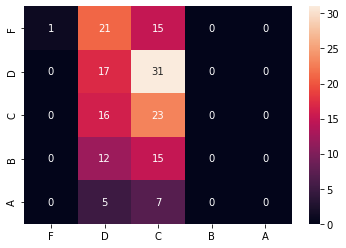

In [87]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.2339098179522256
The accuracy for the classifier is -  0.245398773006135


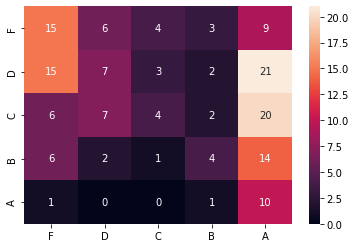

In [88]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing Data and encoding categorical data

In [89]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
pipe = Pipeline([('scale', StandardScaler())])
X_train_ = pipe.fit_transform(X_train)
pca = MiniBatchSparsePCA(n_components=25)
X_train_scaled = pca.fit_transform(X_train_)

In [90]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
X_test_ = pipe.fit_transform(X_test)
X_test_scaled = pca.transform(X_test_)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.3579423521986114
The macro F1 score for the classifier is -  0.25407664863454876
The accuracy for the classifier is -  0.32515337423312884


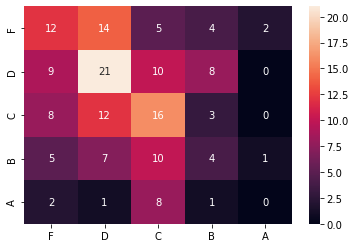

In [91]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**


Best parameters from Cross Validation:  {'solver': 'newton-cg', 'tol': 1e-05}
Cross Validation Best Score 0.3415737428992215
The macro F1 score for the classifier is -  0.33151582103684996
The accuracy for the classifier is -  0.37423312883435583


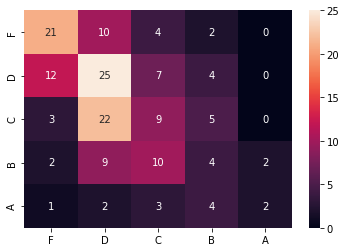

In [92]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**

Best parameters from Cross Validation:  {'C': 1.0, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1e-05}
Cross Validation Best Score 0.3723963812329055
The macro F1 score for the classifier is -  0.2912420753398197
The accuracy for the classifier is -  0.34355828220858897


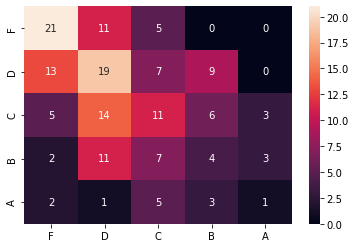

In [93]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi-Layer Perceptron**

Best parameters from Cross Validation:  {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}
Cross Validation Best Score 0.35394487691984006
The macro F1 score for the classifier is -  0.2981527471927814
The accuracy for the classifier is -  0.3619631901840491


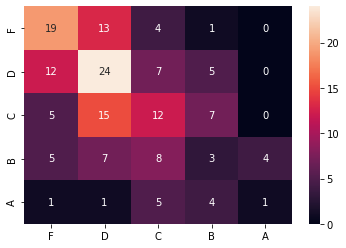

In [94]:
MLPerceptromClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

## **Mission 2**
- Predict final-period academic performance without any prior academic performance data: remove the G1 and G2 columns from the original dataset, then predict G3.

Removing categorical non-binary features and grades. 

In [95]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [96]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.11736821149864629
The accuracy for the classifier is -  0.2147239263803681


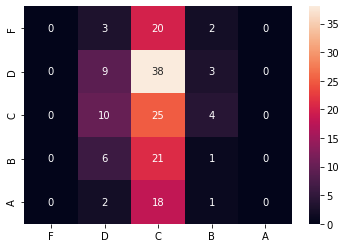

In [97]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.25040487766154157
The accuracy for the classifier is -  0.26380368098159507


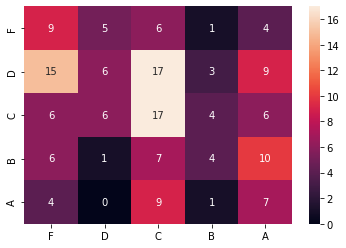

In [98]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.29633915421838836
The macro F1 score for the classifier is -  0.2728308728308728
The accuracy for the classifier is -  0.3067484662576687


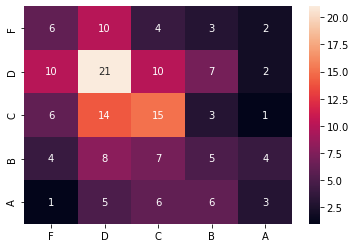

In [99]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'newton-cg', 'tol': 1e-05}
Cross Validation Best Score 0.34963181148748157
The macro F1 score for the classifier is -  0.2934817176123454
The accuracy for the classifier is -  0.3312883435582822


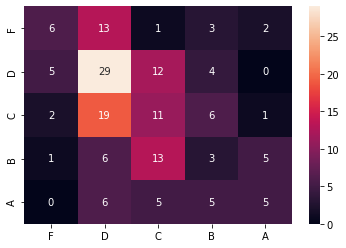

In [100]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 0.8, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1e-05}
Cross Validation Best Score 0.349737008205344
The macro F1 score for the classifier is -  0.3316052383884277
The accuracy for the classifier is -  0.3312883435582822


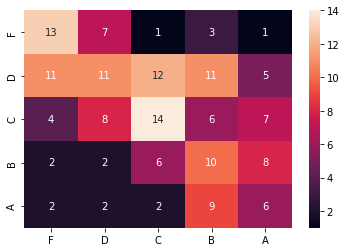

In [101]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

Best parameters from Cross Validation:  {'activation': 'identity', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
Cross Validation Best Score 0.35169366715758466
The macro F1 score for the classifier is -  0.2922286415933789
The accuracy for the classifier is -  0.3374233128834356


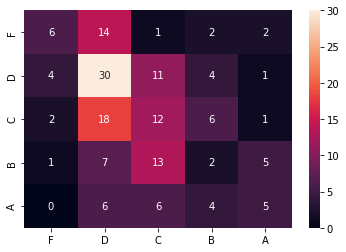

In [102]:
MLPerceptromClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

## **Mission 3**
- Predict final academic performance using all available prior academic performance data: Keep G1 and G2 columns inside the dataset as features, then predict G3.

Removing categorical non-binary features.

In [103]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [104]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.13540106951871658
The accuracy for the classifier is -  0.25153374233128833


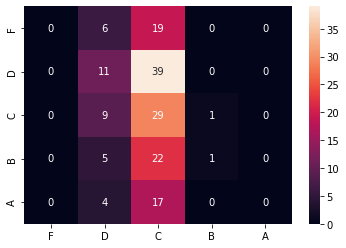

In [105]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.6150584274113686
The accuracy for the classifier is -  0.6012269938650306


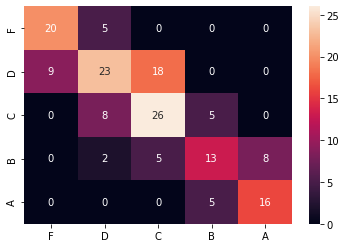

In [106]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing data and encoding categorical data

In [107]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
pipe = Pipeline([('scale', StandardScaler())])
X_train_ = pipe.fit_transform(X_train)
pca = MiniBatchSparsePCA(n_components=25)
X_train_scaled = pca.fit_transform(X_train_)


In [108]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
X_test_ = pipe.fit_transform(X_test)
X_test_scaled = pca.transform(X_test_)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}
Cross Validation Best Score 0.3580685882600463
The macro F1 score for the classifier is -  0.3872834220173864
The accuracy for the classifier is -  0.4233128834355828


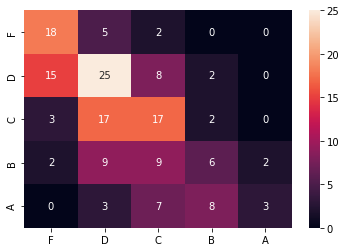

In [109]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'newton-cg', 'tol': 1e-05}
Cross Validation Best Score 0.5862402693035977
The macro F1 score for the classifier is -  0.6623264454843402
The accuracy for the classifier is -  0.656441717791411


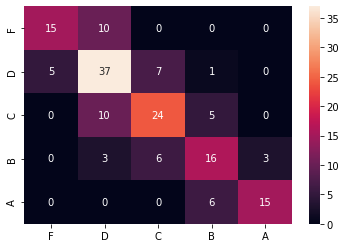

In [110]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 0.9, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.001}
Cross Validation Best Score 0.5801178203240058
The macro F1 score for the classifier is -  0.6657974300831444
The accuracy for the classifier is -  0.6625766871165644


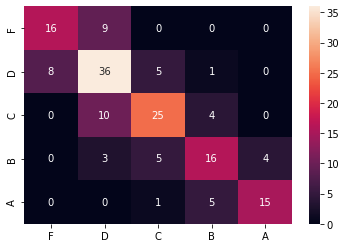

In [111]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

Best parameters from Cross Validation:  {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
Cross Validation Best Score 0.5883231643172733
The macro F1 score for the classifier is -  0.6070745136868664
The accuracy for the classifier is -  0.6073619631901841


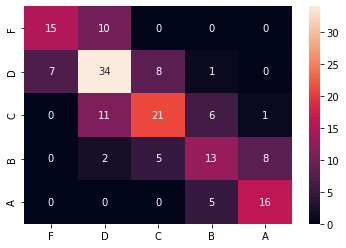

In [113]:
MLPerceptromClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)